

1. The Lorenz 1963 problem refers to a seminal paper published by Edward Lorenz in 1963 titled "Deterministic Nonperiodic Flow."
2. A deterministic system is one in which future behavior is completely determined by its current state and the rules that govern its evolution. In other words, if you know the initial conditions and the rules, you can predict the system's behavior into the future
3. Chaos refers to a type of behavior exhibited by certain deterministic systems. Even though these systems follow deterministic rules, they can produce wildly unpredictable outcomes over time. This unpredictability arises from the extreme sensitivity of these systems to their initial conditions.
4. The Lorenz equations are a set of three differential equations that model the behavior of a simplified atmospheric convection system. They were designed to capture the essential dynamics of weather patterns. When these equations are solved numerically, they produce a pattern of solutions that is known as the Lorenz attractor. This attractor has a characteristic butterfly-like shape

**Conclusion:-**
*It basically says that even a simple mathematical model can give rise to chaos. We cannot make long term prediction because small change in initial condition can give rise to major change in output*





In [60]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp
import pandas as pd

**RK4**

In [61]:
def rk4singlestep(fun,dt,t0,y0):
  f1=fun(t0,y0)
  f2=fun(t0+dt/2,y0+(dt/2)*f1)
  f3=fun(t0+dt/2,y0+(dt/2)*f2)
  f4=fun(t0+dt,y0+dt*f3)
  yout=y0+(dt/6)*(f1+2*f2+2*f3+f4)
  return yout

**Defining constants**

In [62]:
sigma=10
beta=8/3
rho=28

**Defining ODE**

In [63]:
def lorenz(t,y):
  dy=[sigma*(y[1]-y[0]),y[0]*(rho-y[2])-y[1],y[0]*y[1]-beta*y[2]]
  return np.array(dy)

**Solving using RK4**

In [64]:
y0=[-8,8,27]
dt=0.01
T=10
t=np.linspace(0,T,1000)
y=np.zeros((3,1000))
y[:,0]=y0
yin=y0
for i in range(1000-1):
  yout=rk4singlestep(lorenz,dt,t[i],yin)
  y[:,i+1]=yout
  yin=yout

y_df=pd.DataFrame(y)
print(y_df)

    0          1          2          3          4          5          6    \
0  -8.0  -6.486401  -5.138015  -3.941503  -2.882045  -1.944377  -1.113488   
1   8.0   7.803176   7.562600   7.313005   7.078192   6.873878   6.709977   
2  27.0  25.725523  24.608811  23.628929  22.765711  22.001251  21.320461   

         7          8          9    ...        990        991        992  \
0  -0.375062   0.284275   0.876824  ...   5.144543   5.354067   5.583336   
1   6.592359   6.524146   6.506641  ...   7.141571   7.547790   7.975194   
2  20.711116  20.163633  19.670746  ...  18.922248  18.804713  18.728674   

         993        994        995        996        997        998        999  
0   5.832470   6.101517   6.390411   6.698914   7.026564   7.372607   7.735921  
1   8.423377   8.891456   9.377953   9.880672  10.396568  10.921604  11.450622  
2  18.697628  18.715354  18.785886  18.913458  19.102425  19.357144  19.681812  

[3 rows x 1000 columns]


**Solving lorenz eq using built in python function**

In [65]:
lorenz_solution=solve_ivp(lorenz,(0,T),y0,t_eval=t)
t=lorenz_solution.t
Y=lorenz_solution.y.T
# Remember built ib python takes f(t,y) rather than f(x,t) i.e why in ax.plot I am writing Y[:,0]

**Plot 3D graph**

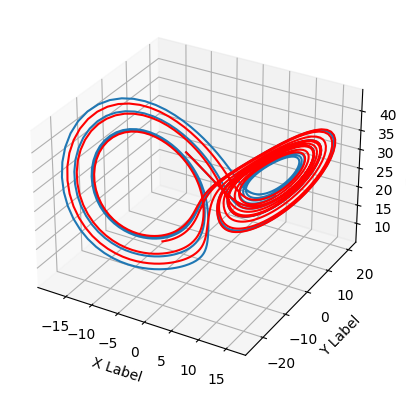

In [66]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(y[0,:],y[1,:],y[2,:])
ax.plot(Y[:,0],Y[:,1],Y[:,2],'r')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()